<a href="https://colab.research.google.com/github/Styleflo/CocoBot/blob/main/ProjetFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Final Apprentissage automatique pour données massives

Equipe : Yann, Alix, Florian, Thomas

# Partie 0 : Import des données

In [ ]:
from datasets import load_dataset
import pandas as pd
import os
import requests
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("DBQ/Chanel.Product.prices.Germany")


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category1_code', 'category2_code', 'category3_code', 'product_code', 'title', 'itemurl', 'imageurl', 'full_price', 'price', 'full_price_eur', 'price_eur', 'flg_discount'],
        num_rows: 1428
    })
})

In [ ]:
df = dataset["train"].to_pandas()


# Partie 1 : Analyse approfondie du jeu de données

## Observations générales

In [ ]:
df.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y0995394305/boy-chanel-kleine-tasche-kalbsleder-metall-mit-ruthenium-finish/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.",5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X08101S221254MOCCI/schmetterlingsbrille-mit-blaulichtfilter-schwarz/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/butterfly-blue-light-glasses-black-acetate-acetate-packshot-default-a71441x08101s2212-8853207154718.jpg",420.0,420.0,420.0,420.0,0
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X09950L241361NUNI/quadratische-sonnenbrille-silberfarben/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/square-sunglasses-silver-titanium-titanium-packshot-default-a71449x09950l2413-8853170782238.jpg",580.0,580.0,580.0,580.0,0
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X01081S856100POCCI/umschliessende-sonnenbrille-blau-rosa/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/shield-sunglasses-blue-pink-acetate-acetate-packshot-default-a71466x01081s8561-8850450087966.jpg",480.0,480.0,480.0,480.0,0


Ceci nous donne une première idée du Dataset.

In [ ]:
df.info()
print("\nTaux de valeurs manquantes par colonne (%):")
print((df.isna().mean() * 100).round(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

Ceci nous donne le type de chaque colonne, combien de valeurs non nulles, et le pourcentage de NaN par colonne.

Selon df.info() et le taux de valeurs manquantes, aucune colonne ne contient de valeurs manquantes au sens strict (NaN). Cependant, certaines colonnes (par exemple category3_code) utilisent la chaîne de caractères "N.A." pour représenter une absence d’information, ce qui peut être assimilé à une valeur manquante d’un point de vue sémantique.

In [ ]:
df.describe(include='all')

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
count,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428.000000,1428.000000,1428.000000,1428.000000,1428.0
unique,1,1,1,1,1,7,51,1,1428,824,1428,1383,NaN,NaN,NaN,NaN,NaN
top,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,READY-TO-WEAR,N.A.,PAS4280B13693,18 Karat Weißgold Diamanten,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.",NaN,NaN,NaN,NaN,NaN
freq,1428,1428,1428,1428,1428,550,243,1428,1,68,1,46,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076.253725,6076.253725,6076.253725,6076.253725,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219.005999,15219.005999,15219.005999,15219.005999,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,23.000000,23.000000,23.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.000000,195.000000,195.000000,195.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.000000,1415.000000,1415.000000,1415.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5800.000000,5800.000000,5800.000000,5800.000000,0.0


Ici, on remarque plusieurs choses intéréssantes :

1. Les colonnes website_name, competence_date, country_code, currency_code, brand, category3_code ne sont pas très utiles : elles ont la même valeur sur toutes les lignes sans exceptions. Ces colonnes sont surtout métadonnées → utiles à décrire le jeu de données, mais pas informatives pour l’apprentissage (aucune variance). On pourra les exclure des features pour les modèles d’embeddings / reco.
2. Tous les product_code, itemurl sont bien différents.
3. Il y a des titres en communs, dont "18 Karat Weißgold Diamanten" qui revient jusqu'à 68 fois.
4. Il y a également des imageurl qui reviennent plusieurs fois (jusqu'à 46 fois)
5. Il semble que full_price, price, full_price_eur, price_eur soient 4 fois la même colonne.
6. Il semble aussi que flg_discount ne soient que des 0.

In [ ]:
diff = (
    (df["price"] != df["full_price"]) |
    (df["price_eur"] != df["price"]) |
    (df["full_price_eur"] != df["price_eur"])
)
diff.sum()

np.int64(0)

On peut conffirmer que les 4 colonnes sont strictement identiques. Nous allons donc précéder à la suppression de toutes les colonnes inutiles :

In [ ]:
# Drop specified columns in-place
df.drop(columns=['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category3_code', 'full_price', 'full_price_eur', 'price_eur', 'flg_discount'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category1_code  1428 non-null   object 
 1   category2_code  1428 non-null   object 
 2   product_code    1428 non-null   object 
 3   title           1428 non-null   object 
 4   itemurl         1428 non-null   object 
 5   imageurl        1428 non-null   object 
 6   price           1428 non-null   float64
dtypes: float64(1), object(6)
memory usage: 78.2+ KB


## Category1_code

Commençons par regarder la colonne category1_code :

In [ ]:
cat1_counts = (
    df["category1_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category1_code", "category1_code": "count"})
)
print("Table: category1_code value counts")
display(cat1_counts)

Table: category1_code value counts


,count,count
0,FASHION,550
1,FRAGRANCE,199
2,JEWELRY,193
3,EYEWEAR,163
4,MAKEUP,121
5,SKINCARE,104
6,WATCHES,98


Voici un tableau de toutes les différentes valeurs de category1_code et leur nombre d'apparitions. Le but ici est de vérifier qu'il n'y a pas de "N.A." par exemple.

## Category2_code

On passe maintenant à l'observation de la colonne category2_code :

In [ ]:
cat2_counts = (
    df["category2_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category2_code", "category2_code": "count"})
)

cat2_counts["percentage"] = (
    df["category2_code"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(drop=True)
)

print("Table: category2_code value counts")
display(cat2_counts)

Table: category2_code value counts


,count,count,percentage
0,READY-TO-WEAR,243,17.02
1,COSTUME JEWELRY,127,8.89
2,SUNGLASSES,99,6.93
3,WOMEN,88,6.16
4,WATCHES,87,6.09
5,MEN,72,5.04
6,HANDBAGS,61,4.27
7,COCO CRUSH,54,3.78
8,SHOES,42,2.94
9,FACE,41,2.87


Pareil ici : un tableau de toutes les différentes valeurs de category2_code et leur nombre d'apparitions et on vérifie qu'il n'y a pas de "N.A.".

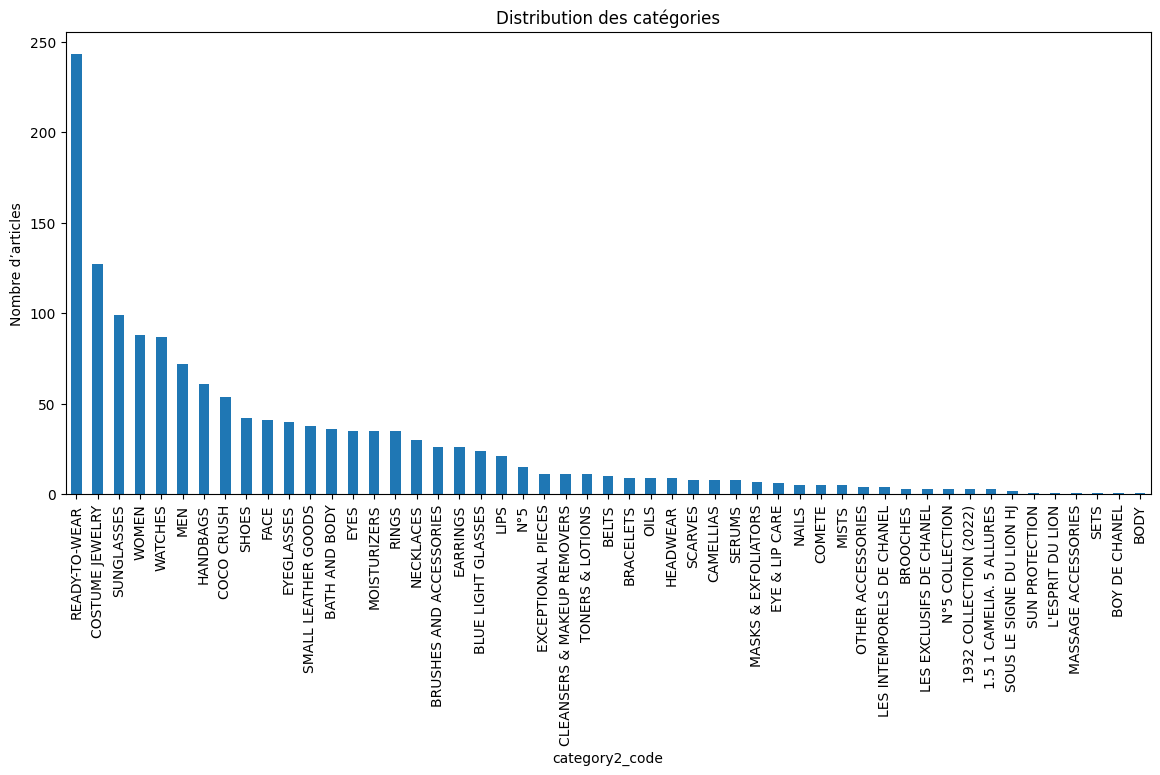

In [ ]:
plt.figure(figsize=(14,6))
df['category2_code'].value_counts().plot.bar()
plt.title("Distribution des catégories")
plt.xlabel("category2_code")
plt.ylabel("Nombre d’articles")
plt.show()


### Analyse de la distribution des catégories

On observe que la répartition des catégories est fortement déséquilibrée.  
Les catégories **READY-TO-WEAR**, **COSTUME JEWELRY**, **SUNGLASSES**, **WATCHES** et **WOMEN** représentent à elles seules **plus de 50 % de l’ensemble du catalogue**.

Cela indique que le dataset est dominé par quelques familles de produits, tandis qu’une grande quantité de catégories disposent seulement de quelques exemples.  

Ce déséquilibre pourrait entraîner des biais lors de l’entraînement des modèles de classification ou de recommandation.


## Imageurl

On se concentre maintenant sur imageurl

In [ ]:
img_counts = (
    df.groupby("imageurl")
      .size()
      .reset_index(name="count")
)
img_counts_duplicated = img_counts[img_counts["count"] > 1]\
                          .sort_values("count", ascending=False)

print("Table: imageurl duplicated (count > 1)")
display(img_counts_duplicated)

Table: imageurl duplicated (count > 1)


,imageurl,count
1382,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.",46


On commence de la même manière : on va regarder toutes les valeurs de imageurl qui sont différentes MAIS qui apparaissent + d'1 fois cette fois ci. Le raisonnement est le suivant : pendant que je m'occupe de cette partie, l'un d'entre nous est entrain de faire un script pour télécharger les images depuis les liens. Les liens qui ne sont donc pas fonctionels (type "N.A.") seront donc de toute façon repérés à cette étape. Ici, nous regardons si certains liens apparaissent plusieurs fois. Et la réponse est oui. On s'en était douté plus tôt lors de la description des colonnes. Il esxiste un lien, qui apparait 46 fois.

In [ ]:
# On prend l'URL la plus fréquente (celle avec le count max)
top_imageurl = (
    img_counts_duplicated
    .sort_values("count", ascending=False)
    ["imageurl"]
    .iloc[0]
)

print(top_imageurl)

https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.


In [ ]:
# Filtrer les lignes ayant exactement cette imageurl
mask = df["imageurl"] == top_imageurl
rows_same_image = df.loc[mask, ["product_code", "title", "imageurl"]]

# Afficher toutes les lignes correspondantes
display(rows_same_image)

# Récupérer uniquement les product_code (éventuellement uniques)
product_codes = rows_same_image["product_code"].unique()

print("Product codes utilisant cette imageurl :")
print(product_codes)
print("Nombre de product_code distincts :", len(product_codes))

# Juste le tout premier ID :
first_product_code = product_codes[0]
print("Premier product_code :", first_product_code)


,product_code,title,imageurl
1,PA67085Y09953,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
58,PAA9624B14802,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
83,PG31318B14610,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
92,PAS3261B14471,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
102,PG02819Y01552,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
104,PG45335B14498,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
112,PAA9624B14805,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
189,PAA9624B14804,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
337,PG02819B14615,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."
339,PG31318Y50006,n.a.,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a."


Product codes utilisant cette imageurl :
['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471'
 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804'
 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232'
 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480'
 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865'
 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059'
 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280'
 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502'
 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059'
 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797'
 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620'
 'PP75251V66955' 'PP75166V66807']
Nombre de product_code distincts : 46
Premier product_code : PA67085Y09953


Nous savons donc maintenant que le lien https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a. apparait 46 fois, avec tous ces produits : ['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471' 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804' 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232' 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480' 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865' 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059' 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280' 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502' 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059' 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797' 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620' 'PP75251V66955' 'PP75166V66807'].

Cependant, nous nous rendrons compte plus tard (lors du script pour télécharger toutes les images) que des 1383 liens distincts d'image, seulement 900 nous redirigent effectivement sur des images exploitables, et par chance, le lien qui apparait 46 fois n'en fait pas partie, nous n'aurons donc pas à gérer d'avantage ce cas.

### Import des images

Nous allons donc télécharger les images à l'aide d'un script. Les images seront stockées dans un dossier Images et on travaillera avec un un dataframe contenant les noms des images. Leurs noms est leur product_id. Enfin on créer un fichier csv pour eviter de re-télécharger les images.

In [ ]:
if os.path.exists('data_images.csv') and os.path.exists('Images') and os.path.isdir('Images'):
    df_images = pd.read_csv('data_images.csv')

else:

    url_column = "imageurl"

    # 2. Créer un dossier pour stocker les images
    output_dir = "Images"
    os.makedirs(output_dir, exist_ok=True)

    valid_rows = []  # stocke les lignes valides
    image_paths = [] # stocke les chemins d'images valides

    # 3. Télécharger chaque image
    for idx, url in tqdm(df[url_column].items(), total=len(df), desc="Téléchargement images"):
        if pd.isna(url):
            continue

        # Accès direct au product_code
        product_code = df.loc[idx, 'product_code']
        name = f"{product_code}.jpg"
        filename = os.path.join(output_dir, name)

        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            # Sauvegarde de l'image
            with open(filename, "wb") as f:
                f.write(response.content)

            # Ligne valide → on stocke la ligne + chemin
            valid_rows.append(idx)
            image_paths.append(name)

        except:
            # Pas d'affichage d'erreur (totalement silencieux)
            pass

    # 4. Nettoyage : garder uniquement les bonnes lignes
    df_images = df.loc[valid_rows].reset_index(drop=True)

    # Ajout de la colonne image_path
    df_images["image"] = image_paths

    # 5. Sauvegarde du dataset propre
    df_images.to_csv("data_images.csv", index=False)

    print("✔ Téléchargement terminé")
    print(f"✔ Lignes valides conservées : {len(df_images)}")
    print("✔ Chemins d'images ajoutés dans la colonne 'image_path'")
    print("✔ Dataset nettoyé : data_clean.csv")

Téléchargement images: 100%|██████████| 1428/1428 [04:32<00:00,  5.23it/s]

✔ Téléchargement terminé
✔ Lignes valides conservées : 900
✔ Chemins d'images ajoutés dans la colonne 'image_path'
✔ Dataset nettoyé : data_clean.csv


On visulatise le dataset avec les images

In [ ]:
df_images

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg
...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg


On créer une fonction permettant d'augmenter notre dataframe avec les données des images (Canaux, mode, taille, poid)

In [ ]:
def get_image_info(image):
    try:
        path = f"Images/{image}"
        with Image.open(path) as img:
            return {
                'format': img.format,            # JPEG, PNG, etc.
                'mode': img.mode,                # RGB, L, etc.
                'width': img.width,
                'height': img.height,
                'size_bytes': os.path.getsize(path)  # taille en octets
            }
    except Exception as e:
        print(f"Erreur avec {image}: {e}")
        return {
            'format': None,
            'mode': None,
            'width': None,
            'height': None,
            'size_bytes': None
        }

In [ ]:
# Appliquer la fonction à chaque image
info_list = df_images['image'].apply(get_image_info)

# Convertir la liste de dictionnaires en DataFrame et concaténer
df_info = pd.concat([df_images, pd.DataFrame(info_list.tolist())], axis=1)



In [ ]:
df_info

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,format,mode,width,height,size_bytes
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg,JPEG,RGB,378,400,23782
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg,JPEG,RGB,378,400,5155
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg,JPEG,RGB,378,400,4392
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg,JPEG,RGB,378,400,6154
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg,JPEG,RGB,378,400,6691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg,JPEG,RGB,340,400,17044
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg,PNG,P,188,274,15578
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg,PNG,P,68,370,8118
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg,PNG,P,127,290,10803


On s'interesse seulement aux données des images

In [ ]:
df_info_images = df_info[['image', 'format', 'mode', 'width', 'height', 'size_bytes']]

In [ ]:
df_info_images[['width', 'height']].value_counts()

,,count
width,height,
378,400,375
389,400,189
302,400,25
340,400,19
341,400,12
159,331,5
237,161,3
193,381,3
183,331,3


In [ ]:
df_info_images['mode'].value_counts()

,count
mode,
RGB,900


In [ ]:
df_info_images['format'].value_counts()

,count
format,
JPEG,900


On confirme dans la partie suivante que l'url apparaissant 46 fois n'est pas présente dans le dataframe avec les images

In [ ]:
codes = [
    'PA67085Y09953', 'PAA9624B14802', 'PG31318B14610', 'PAS3261B14471',
    'PG02819Y01552', 'PG45335B14498', 'PAA9624B14805', 'PAA9624B14804',
    'PG02819B14615', 'PG31318Y50006', 'PG31319B14615', 'PG45220B14232',
    'PAA9476B14214', 'PAA9624B14806', 'PG29762X01000', 'PAS4051B14480',
    'PAS1161B14552', 'PG31319Y50006', 'PAP0213Y01864', 'PP75181V66865',
    'PA01112Y01295', 'PA37586Y04634', 'PG02819B14610', 'PA35200Y04059',
    'PAS4388B14299', 'PAS4051B14446', 'PAS4388B14301', 'PA69900B13280',
    'PP75338K10824', 'PA01112B12979', 'PG45220B14084', 'PG45289B14502',
    'PAS1160B07327', 'PP75267V66800', 'PAS3980B14407', 'PA69900Y04059',
    'PA01113Y01864', 'PAA9476B14213', 'PAS3261B13369', 'PAS3261B14797',
    'PAP0250Y01480', 'PAP3267B14552', 'PAS4051B14445', 'PG31319B14620',
    'PP75251V66955', 'PP75166V66807'
]

df_images['product_code'].isin(codes).value_counts()

,count
product_code,
False,900


On remarque ici que les 46 urls présents ne le sont plus

On créer une fonction permettant de transformer toutes nos images en des images standardisées en RGB et en JEPG.

In [ ]:
output_dir_clean = "Images"
os.makedirs(output_dir_clean, exist_ok=True)

for idx, image in enumerate(df_images['image']):
    try:
        img = Image.open(f"Images/{image}")
        img_rgb = img.convert('RGB')  # convertit en RGB
        # Accès direct au product_code
        product_code = df_images.loc[idx, 'product_code']
        filename = os.path.join(output_dir_clean, f"{product_code}.jpg")
        img_rgb.save(filename, format='JPEG')  # sauvegarde l'image en JPEG
    except Exception as e:
        print(f"Erreur avec {image}: {e}")

## Title

Passons maintenant à l'exploration de la colonne title

In [ ]:
# Table: titres qui apparaissent plus d'une fois + leur nombre d'apparitions
title_counts = (
    df_images.groupby("title")
      .size()
      .reset_index(name="count")
)

title_counts_duplicated = (
    title_counts[title_counts["count"] > 1]
    .sort_values("count", ascending=False)
)

# Afficher jusqu'à 500 lignes (par ex. ; mets None pour tout)
pd.set_option("display.max_rows", 500)
# Ne pas tronquer le texte dans les colonnes
pd.set_option("display.max_colwidth", None)

print("Table: title duplicated (count > 1)")
display(title_counts_duplicated)
print(title_counts_duplicated.shape)

Table: title duplicated (count > 1)


,title,count
479,Schwarz. Gläser: Grau Mit Verlauf,17
470,Schwarz,13
484,Schwarz. Gläser: Transparent,11
2,18 Karat Weißgold Diamanten,10
478,Schwarz. Gläser: Grau,9
124,EAU DE TOILETTE ZERSTÄUBER,8
96,DEODORANT SPRAY,7
288,LES EXCLUSIFS DE CHANEL - EAU DE PARFUM,6
344,Metall Glasperlen & Strass Goldfarben Perlmuttweiß & Kristall,6
362,Metall Lammleder & Strass Goldfarben Schwarz & Kristall,6


(145, 2)


On voit ici qu'il y'a 145 titres qui apparaissent +d'1 fois.

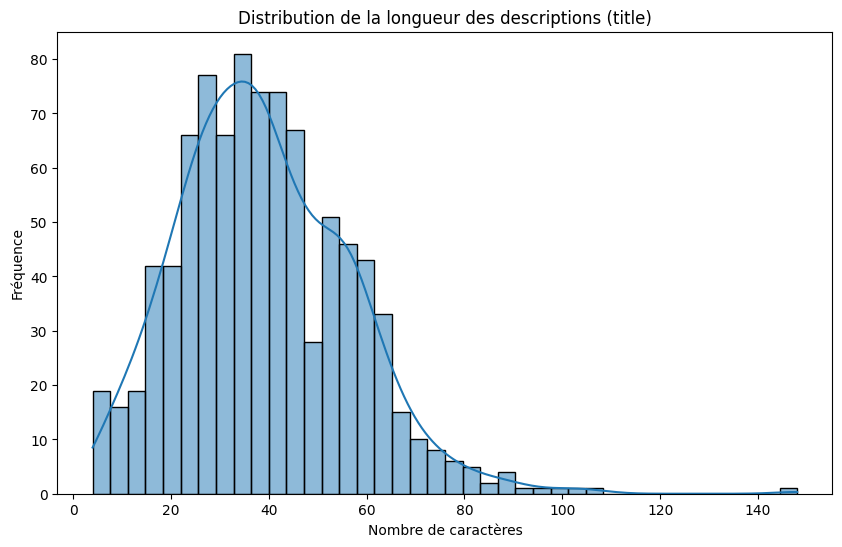

,title_len
count,900.000000
mean,39.032222
std,17.462436
min,4.000000
25%,27.000000
50%,37.000000
75%,51.000000
max,148.000000


In [ ]:
df_images['title_len'] = df_images['title'].astype(str).str.len()

plt.figure(figsize=(10,6))
sns.histplot(df_images['title_len'], bins=40, kde=True)
plt.title("Distribution de la longueur des descriptions (title)")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

df_images['title_len'].describe()


### Analyse de la longueur des descriptions (title)

La plupart des titres de produits sont relativement courts : la majorité se situe entre **20 et 40 caractères**. La distribution est asymétrique, avec une longue traîne de titres plus détaillés mais beaucoup plus rares.

Cela suggère que les descriptions textuelles ne sont pas de véritables descriptions marketing complètes, mais plutôt des noms de produits.  

Ce manque d’information textuelle pourrait limiter la richesse des embeddings textuels et leur capacité à capturer les différences entre produits très similaires au sein d’une même catégorie.

## Price

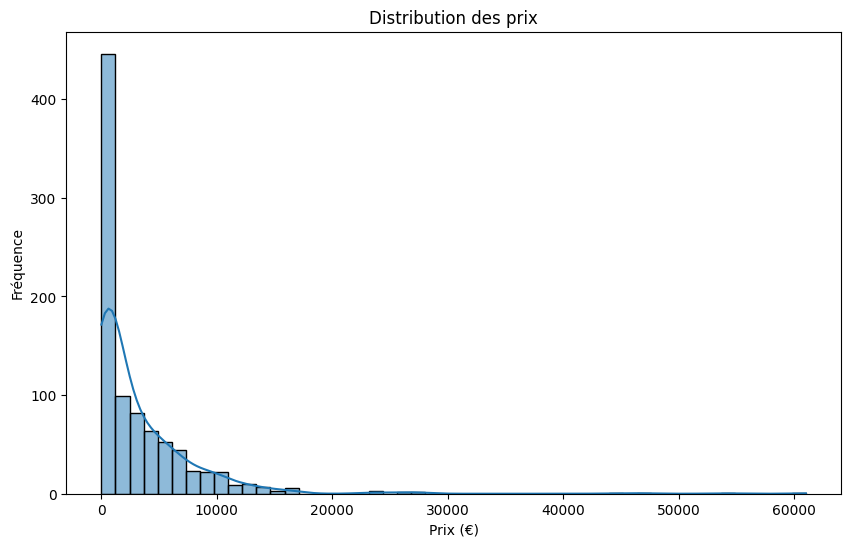

,price
count,900.000000
mean,3239.513689
std,5151.902095
min,23.000000
25%,380.000000
50%,1275.000000
75%,4700.000000
max,61000.000000


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_images['price'], bins=50, kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_images['price'].describe()


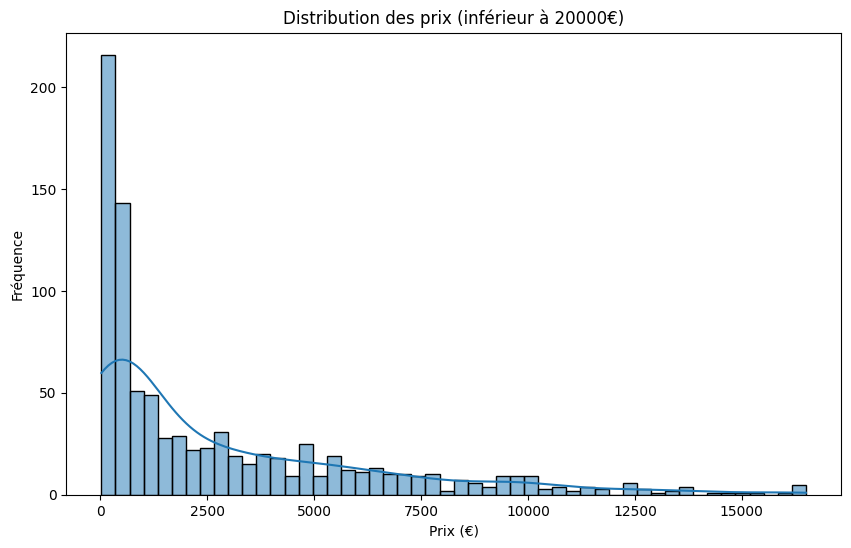

,price
count,889.000000
mean,2846.864252
std,3475.395525
min,23.000000
25%,360.000000
50%,1240.000000
75%,4450.000000
max,16500.000000


In [ ]:
df_filtered = df_images[df_images['price'] < 20000]

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title("Distribution des prix (inférieur à 20000€)")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_filtered['price'].describe()

### Analyse de la distribution des prix

La distribution des prix est fortement asymétrique : la plupart des produits se situent dans une gamme de prix relativement accessible pour une marque de luxe, tandis qu’une portion très limitée d’articles très haut de gamme génère une longue traîne de prix élevés.

La médiane se situe à **1240 €**, ce qui signifie que **la moitié des produits coûtent moins de ce montant**, tandis que la moyenne est tirée vers le haut par des prix extrêmes atteignant **16 500 €**.  

Cette hétérogénéité du prix devra être prise en compte, notamment via des transformations (log-scale) pour éviter que les outliers ne perturbent les modèles.


## Préparation des données

#### Redimensionnement des images

In [ ]:
from PIL import Image
import shutil

input_dir = "Images"
output_dir = "Images_resized"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

img_dim = (256, 256) # Taille à définir

print("Starting resizing")

for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = Image.open(img_path)
    img_resized = img.resize(img_dim)

    out_path = os.path.join(output_dir, filename)
    img_resized.save(out_path)

print("Resizing done !")

Starting resizing
Resizing done !


#### Augmentation des données

In [ ]:
import tensorflow as tf

# Création du pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(factor=0.2),
])

In [ ]:
input_dir = "Images_resized"
output_dir = "Images_aug"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

df_aug = pd.DataFrame(columns=df_images.columns) # nouveau dataframe

n_aug = 4 # Nombre d'images à créer
import imghdr
image_idx = "image"

for idx, row in tqdm(df_images.iterrows()):
    filename = row[image_idx]
    name, ext = os.path.splitext(filename)
    img = Image.open(img_path)
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)

    out_name = f"{name}_0{ext}"
    out_path = os.path.join(output_dir, out_name)
    img.save(out_path)

    new_row = row.copy()
    new_row[image_idx] = out_name
    df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

    for i in range(1, n_aug + 1):
        out_img_name = f"{name}_{i}{ext}"
        aug_img = data_augmentation(img_batch)[0].numpy()
        out_path = os.path.join(output_dir, out_img_name)
        tf.keras.utils.save_img(out_path, aug_img) # sauvegarde dans le dossier

        # Ajoute une ligne dans le nouveau dataframe
        new_row = row.copy()
        new_row[image_idx] = out_img_name
        df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

/tmp/ipython-input-1568788328.py:12: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
0it [00:00, ?it/s]/tmp/ipython-input-1568788328.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)
900it [04:25,  3.39it/s]


In [ ]:
df_aug

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_0.jpg,53
1,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_1.jpg,53
2,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_2.jpg,53
3,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_3.jpg,53
4,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_4.jpg,53
...,...,...,...,...,...,...,...,...,...
4495,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_0.jpg,38
4496,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_1.jpg,38
4497,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dw

In [ ]:
df_aug = df_aug.drop_duplicates(subset=['imageurl'])

Index(['category1_code', 'category2_code', 'product_code', 'title', 'itemurl',
       'imageurl', 'price', 'image', 'title_len'],
      dtype='object')

## Visualisation des exemples des produits pour chaque catégorie majeure